# Assignment 4 - TinyML HelloWorld - Section 1
Based on the **hello_world** example from [TensorFlow Lite for MicroControllers](https://github.com/tensorflow/tflite-micro/tree/main/tensorflow/lite/micro/examples/hello_world).

© SkillSurf 2024

## Introduction

In this section you will train a Tensorflow model to a set of sinusoidal data. First you will synthesize the data to mimic a sine wave. Then you can build your own tensorflow model and fit the model to the generated data. Start by importing the relevant modules.

## Import modules

In [1]:
# Import Tensorflow and NumPy
# Set random seed to get reproducible results
import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [2]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import math

##  Create the Dataset

You can use NumPy to generate a sinewave data and add some gaussian noise to make the data more realistic. The dataset will consist of 1000 datapoints (x-values) and relevant y-values. The following code creates a sine wave dataset.

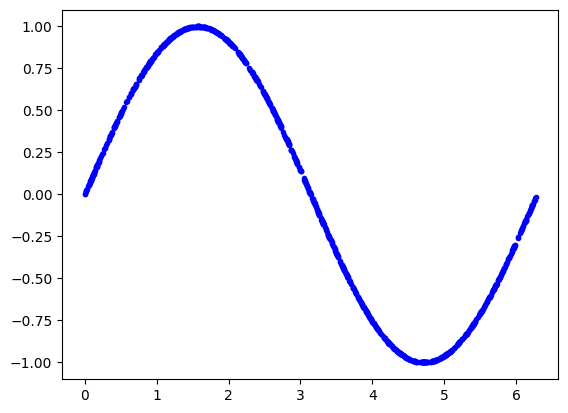

In [3]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot the data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

Next add noise to the data to make the data more realistic. (In real-life the data we obtain usually get contaminated by different kinds of noise.)

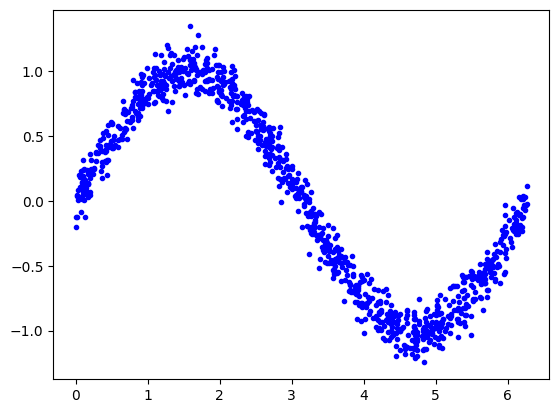

In [4]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

## Pre-process data (Graded)

The dataset has been given, now you will have to split this dataset into train, validation and test subsets. The following table shows the split ratio you should be using.

| Split | Percentage |
|----------|----------|
| Train | 60% |
| Validation | 20% |
| Test | 20% |

You may use the `np.split()` function for obtaining 3 splits of data from one line of code. You have to provide the indiced of points which the dataset is divided. The second argument to `np.split()` is an array of indices where the data will be split. We provide two indices, so the data will be divided into three chunks. For more clarification look into the documentation of [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html).


### Exercise 1
Complete the code below to split the data accordingly and plot all three splits in the same plot.

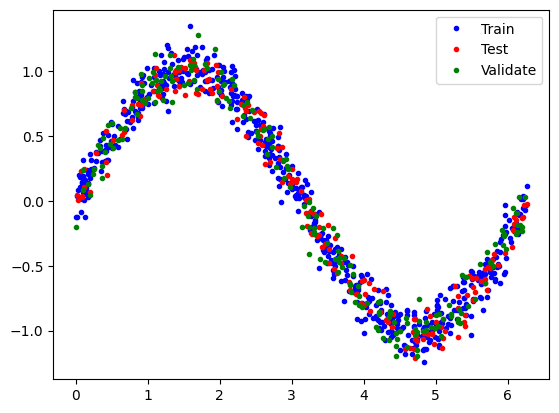

In [5]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'g.', label="Validate")
plt.legend()
plt.show()


## Build the Model (Graded)

You have successfully pre-processed the dataset. Next you will have to define build the Tensorflow model using Keras. You may use the Tensorflow Keras Sequential API. Please refer to the official [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers) for further information. Use the below architecture to design your the model.

- Input layer
- 2 Dense layers each consisting of 16 hidden units and ReLU activation - [keras.layers.Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- Output layer with 1 unit

### Exercise 2
Design the sequential model according to the specifications above.




In [6]:
# Define the model using the Keras API (with the correct input shape)
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(1,)), 
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1) 
])

Now that you have created the model, specify the optimizer, loss function and acuracy metrics. Use the below,

- Optimizer: Adam
- Loss function: Mean Squared Error (MSE)
- Metric: Mean Absolute Error (MAE)

You may use `model.compile()` and read the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) documentation for this.

### Exercise 3
Set the optimizer and loss function details as specified as above.

In [7]:
# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Model (Graded)

Fit the model to the data using `model.fit()`. Train for 500 epochs with a batch size of 64. Use only the train and validation sets during training.

### Exercise 4
Fit the model to the data. Keep track of the losses and metrics using `history` object.

In [9]:
# Fit the model to the data and keep track of losses and metrics
history = model.fit(
    x_train,  
    y_train,  
    epochs=500, 
    batch_size=64,  
    validation_data=(x_validate, y_validate)
)

Epoch 1/500


10/10 [==============================] - 2s 43ms/step - loss: 2.1099 - mae: 1.1730 - val_loss: 1.4901 - val_mae: 1.0491
Epoch 2/500
10/10 [==============================] - 0s 11ms/step - loss: 1.0907 - mae: 0.9009 - val_loss: 0.8148 - val_mae: 0.8233
Epoch 3/500
10/10 [==============================] - 0s 11ms/step - loss: 0.6498 - mae: 0.7246 - val_loss: 0.5633 - val_mae: 0.6711
Epoch 4/500
10/10 [==============================] - 0s 11ms/step - loss: 0.4988 - mae: 0.6192 - val_loss: 0.4882 - val_mae: 0.6006
Epoch 5/500
10/10 [==============================] - 0s 11ms/step - loss: 0.4625 - mae: 0.5812 - val_loss: 0.4750 - val_mae: 0.5919
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 0.4506 - mae: 0.5726 - val_loss: 0.4617 - val_mae: 0.5847
Epoch 7/500
10/10 [==============================] - 0s 14ms/step - loss: 0.4368 - mae: 0.5654 - val_loss: 0.4472 - val_mae: 0.5767
Epoch 8/500
10/10 [==============================] - 0s 9ms/step - loss: 0

Epoch 59/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1016 - mae: 0.2628 - val_loss: 0.1119 - val_mae: 0.2760
Epoch 60/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0989 - mae: 0.2581 - val_loss: 0.1088 - val_mae: 0.2711
Epoch 61/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0965 - mae: 0.2542 - val_loss: 0.1065 - val_mae: 0.2654
Epoch 62/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0937 - mae: 0.2475 - val_loss: 0.1050 - val_mae: 0.2619
Epoch 63/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0917 - mae: 0.2429 - val_loss: 0.1023 - val_mae: 0.2558
Epoch 64/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0896 - mae: 0.2376 - val_loss: 0.1009 - val_mae: 0.2507
Epoch 65/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0880 - mae: 0.2348 - val_loss: 0.0994 - val_mae: 0.2507
Epoch 66/500
10/10 [==============================] - 0s 11ms/step - 

10/10 [==============================] - 0s 9ms/step - loss: 0.0591 - mae: 0.1722 - val_loss: 0.0701 - val_mae: 0.1924
Epoch 121/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0587 - mae: 0.1725 - val_loss: 0.0698 - val_mae: 0.1934
Epoch 122/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0585 - mae: 0.1715 - val_loss: 0.0694 - val_mae: 0.1907
Epoch 123/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0584 - mae: 0.1724 - val_loss: 0.0689 - val_mae: 0.1919
Epoch 124/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0580 - mae: 0.1699 - val_loss: 0.0687 - val_mae: 0.1889
Epoch 125/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0571 - mae: 0.1696 - val_loss: 0.0683 - val_mae: 0.1922
Epoch 126/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0571 - mae: 0.1711 - val_loss: 0.0678 - val_mae: 0.1919
Epoch 127/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0

10/10 [==============================] - 0s 11ms/step - loss: 0.0405 - mae: 0.1428 - val_loss: 0.0476 - val_mae: 0.1600
Epoch 182/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0402 - mae: 0.1427 - val_loss: 0.0472 - val_mae: 0.1610
Epoch 183/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0398 - mae: 0.1425 - val_loss: 0.0468 - val_mae: 0.1597
Epoch 184/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0395 - mae: 0.1414 - val_loss: 0.0466 - val_mae: 0.1580
Epoch 185/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0392 - mae: 0.1410 - val_loss: 0.0461 - val_mae: 0.1584
Epoch 186/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0390 - mae: 0.1412 - val_loss: 0.0459 - val_mae: 0.1589
Epoch 187/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0389 - mae: 0.1410 - val_loss: 0.0455 - val_mae: 0.1567
Epoch 188/500
10/10 [==============================] - 0s 9ms/step - loss: 0.

10/10 [==============================] - 0s 10ms/step - loss: 0.0263 - mae: 0.1174 - val_loss: 0.0292 - val_mae: 0.1281
Epoch 243/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0258 - mae: 0.1174 - val_loss: 0.0288 - val_mae: 0.1293
Epoch 244/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0259 - mae: 0.1180 - val_loss: 0.0287 - val_mae: 0.1293
Epoch 245/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0259 - mae: 0.1177 - val_loss: 0.0283 - val_mae: 0.1280
Epoch 246/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0253 - mae: 0.1164 - val_loss: 0.0282 - val_mae: 0.1269
Epoch 247/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0252 - mae: 0.1154 - val_loss: 0.0281 - val_mae: 0.1259
Epoch 248/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0250 - mae: 0.1155 - val_loss: 0.0276 - val_mae: 0.1266
Epoch 249/500
10/10 [==============================] - 0s 11ms/step - loss: 0.

10/10 [==============================] - 0s 9ms/step - loss: 0.0178 - mae: 0.1022 - val_loss: 0.0179 - val_mae: 0.1054
Epoch 304/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0175 - mae: 0.1005 - val_loss: 0.0178 - val_mae: 0.1054
Epoch 305/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0172 - mae: 0.1004 - val_loss: 0.0174 - val_mae: 0.1047
Epoch 306/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0172 - mae: 0.0996 - val_loss: 0.0176 - val_mae: 0.1048
Epoch 307/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0171 - mae: 0.1007 - val_loss: 0.0172 - val_mae: 0.1051
Epoch 308/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0174 - mae: 0.1021 - val_loss: 0.0177 - val_mae: 0.1050
Epoch 309/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0167 - mae: 0.0985 - val_loss: 0.0172 - val_mae: 0.1043
Epoch 310/500
10/10 [==============================] - 0s 15ms/step - loss: 0

10/10 [==============================] - 0s 14ms/step - loss: 0.0136 - mae: 0.0922 - val_loss: 0.0129 - val_mae: 0.0908
Epoch 365/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0134 - mae: 0.0917 - val_loss: 0.0136 - val_mae: 0.0925
Epoch 366/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0135 - mae: 0.0914 - val_loss: 0.0129 - val_mae: 0.0906
Epoch 367/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0133 - mae: 0.0910 - val_loss: 0.0135 - val_mae: 0.0922
Epoch 368/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0137 - mae: 0.0926 - val_loss: 0.0134 - val_mae: 0.0920
Epoch 369/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0137 - mae: 0.0923 - val_loss: 0.0128 - val_mae: 0.0905
Epoch 370/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0132 - mae: 0.0914 - val_loss: 0.0130 - val_mae: 0.0909
Epoch 371/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0

10/10 [==============================] - 0s 14ms/step - loss: 0.0123 - mae: 0.0888 - val_loss: 0.0118 - val_mae: 0.0863
Epoch 426/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0121 - mae: 0.0879 - val_loss: 0.0116 - val_mae: 0.0862
Epoch 427/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0122 - mae: 0.0878 - val_loss: 0.0118 - val_mae: 0.0867
Epoch 428/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0121 - mae: 0.0879 - val_loss: 0.0115 - val_mae: 0.0856
Epoch 429/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0121 - mae: 0.0879 - val_loss: 0.0125 - val_mae: 0.0883
Epoch 430/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0128 - mae: 0.0913 - val_loss: 0.0117 - val_mae: 0.0868
Epoch 431/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0122 - mae: 0.0883 - val_loss: 0.0117 - val_mae: 0.0864
Epoch 432/500
10/10 [==============================] - 0s 13ms/step - loss: 

10/10 [==============================] - 0s 9ms/step - loss: 0.0122 - mae: 0.0884 - val_loss: 0.0117 - val_mae: 0.0877
Epoch 487/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0122 - mae: 0.0893 - val_loss: 0.0112 - val_mae: 0.0843
Epoch 488/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0119 - mae: 0.0875 - val_loss: 0.0115 - val_mae: 0.0853
Epoch 489/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0121 - mae: 0.0884 - val_loss: 0.0130 - val_mae: 0.0924
Epoch 490/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0130 - mae: 0.0908 - val_loss: 0.0111 - val_mae: 0.0847
Epoch 491/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0120 - mae: 0.0874 - val_loss: 0.0117 - val_mae: 0.0858
Epoch 492/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0120 - mae: 0.0883 - val_loss: 0.0113 - val_mae: 0.0863
Epoch 493/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0

## Plotting Loss Curves

The following code plots the loss curves (Training loss and validation loss) with each epoch. The loss curve can be used to check whether your model converged correctly.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="Loss Curves" width="600"/>

Run the below cell and make sure your loss curves appear to be as the ones on the right of the below image. For more reading, refer to [this](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like).

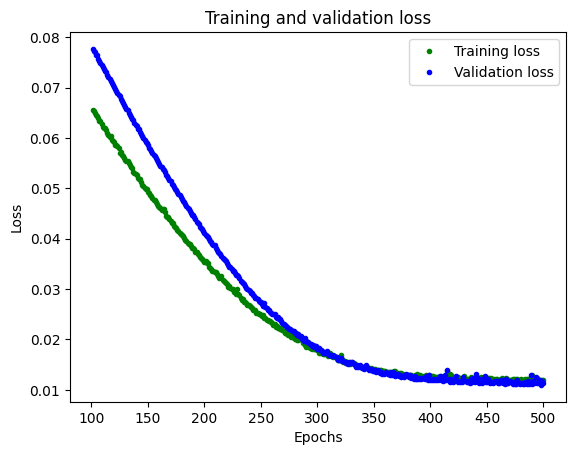

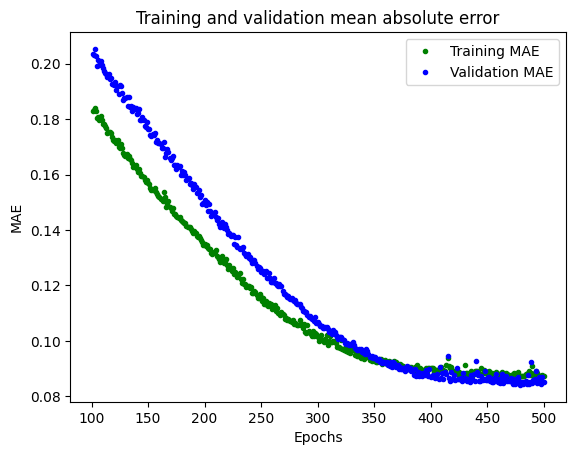

In [10]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Predict using model (Graded)

Use `model.predict()` to predict values for all data in test set and plot it against true values. You may refer to this [documentation](https://www.tensorflow.org/guide/keras/training_with_built_in_methods) for more information.

### Exercise 5
Predict y values for test data and plot it with true values.

7/7 [==============================] - 0s 3ms/step


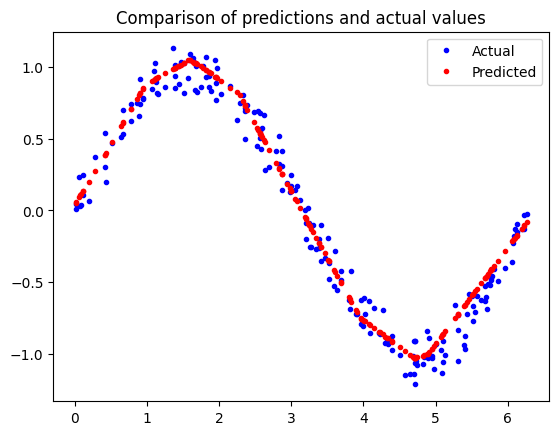

In [11]:
# Make predictions based on our test dataset (TODO)
predictions = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

### Exercise 6
The predicted graph is not nearly as smooth enough to be a sine. Rather it may look like a piecewise combination of linear functions. Briefly explain how you can make this more smoother and identical to an actual sine wave.

To achieve smoother predictions that more closely resemble a sine wave, I would start by increasing the model's complexity. My current model might be too simple, so adding more hidden layers or increasing the number of neurons could help it capture the smooth, oscillatory nature of a sine wave better. Additionally, I would consider using activation functions like tanh instead of ReLU, as tanh can better model smooth, continuous patterns. Ensuring that the input features are properly scaled is also crucial, so I’d use normalization or standardization to improve the model’s learning capability. Training the model for more epochs might be necessary to give it enough time to learn the underlying patterns of the sine wave.

## Get weights

Now you will extract the weight matrices from the model. This step is in order to convert these weight matrices to C++ files that will be embedded in the Microcontroller.

In [12]:
# Extract weights and biases as Numpy arrays
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
W3, b3 = model.layers[2].get_weights()

In [13]:
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(1, 16) (16,)
(16, 16) (16,)
(16, 1) (1,)


The following code performs the forward propagation of the model manually using NumPy matrix multiplication. Run the following code to make sure the model's prediction and manual prediction is same.

In [14]:
xs = x_test

In [15]:
# This is what the TF model does internally:
ys = []
for x in xs:
    x = np.array([x])       # x should be array
    h1 = x @ W1 + b1        # dense layer
    h1 = np.maximum(0, h1)  # ReLU
    h2 = h1 @ W2 + b2       # dense layer
    h2 = np.maximum(0, h2)  # ReLU
    h3 = h2 @ W3 + b3       # dense layer
    ys.append(h3)

ys = np.stack(ys)

In [16]:
# Are our predictions the same as TF's predictions?
# This should print 0 if the results are close enough.
np.sum(np.abs(ys - predictions) > 1e-6)

0

## Export the weights for C++

The following code compresses the weights and biases into a C++ format which will be stored in the Microcontroller's FLASH memory. Copy the generated output and paste in file named `model_data.cpp`.

In [17]:
# Note that we transpose W2. This makes the inner loop for the
# matrix multiplication a little simpler.

names = ["W1_data", "b1_data", "W2_data", "b2_data", "W3_data", "b3_data"]
arrays = [W1, b1, W2.T, b2, W3, b3]

In [18]:
# Copy this into model_data.cpp:

for name, array in zip(names, arrays):
    print("const float %s[] PROGMEM = {" % name)
    print("   ", ", ".join([str(x) + "f" for x in array.flatten()]))
    print("};\n")

const float W1_data[] PROGMEM = {
    -0.3598743f, 0.31073716f, -0.3717797f, 0.50662285f, 0.34022796f, -0.004984583f, 0.6207487f, -0.38874498f, 0.1631426f, 0.49777567f, 0.21118535f, -0.34723943f, 0.42355445f, 0.19132245f, -0.5330757f, 0.21218579f
};

const float b1_data[] PROGMEM = {
    0.0f, 0.1650896f, 0.0f, 0.51006687f, -0.7803668f, -0.026814323f, 0.21903397f, 0.0f, 0.41278872f, -0.20886959f, -0.6864635f, 0.0f, -0.67286766f, -0.36062562f, 0.0f, -0.37113577f
};

const float W2_data[] PROGMEM = {
    -0.017497867f, -0.4277002f, 0.1437091f, -0.30351767f, 0.16224076f, 0.05627217f, 0.07962176f, -0.19065435f, -0.20759092f, 0.25149745f, -0.22829217f, 0.18345526f, 0.16736044f, 0.33089197f, 0.34251818f, 0.37558576f, -0.14263245f, -0.3470347f, -0.23008971f, 0.30666333f, 0.04397757f, -0.042425003f, 0.1710509f, -0.20504121f, -0.18889104f, 0.3744511f, 0.21015538f, 0.062729955f, 0.32462662f, 0.23445314f, 0.039061338f, 0.38995367f, 0.34256944f, 0.37936524f, 0.2538747f, -0.23645855f, -0.37135956f,

## End of Section 1